In [1]:
#https://drive.google.com/file/d/16o-z_qZpgoLCoQxW4aLSzEHJoxiaWqZ7/view?usp=sharing
#https://drive.google.com/file/d/1o9G_I0xRn3LRhDzdurduloVrPeKdFcH9/view

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
import PIL
import cv2
from keras.constraints import maxnorm
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

In [3]:
dataset_url = "https://drive.google.com/file/d/1o9G_I0xRn3LRhDzdurduloVrPeKdFcH9/view?usp=sharing"
data_dir = tf.keras.utils.get_file('Galaxy_Dataset_without_elliptical', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
data_dir
image_count =  len(list(data_dir.glob('*/*.png')))
print(image_count)

AttributeError: 'str' object has no attribute 'glob'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/Galaxy_Dataset_without_elliptical')

In [6]:
list(data_dir.glob('*/*.png'))[:5]

[PosixPath('datasets/Galaxy_Dataset_without_elliptical/Irregular Galaxy/thumb-ngc4214444.png'),
 PosixPath('datasets/Galaxy_Dataset_without_elliptical/Irregular Galaxy/thumb-ngc444999.png'),
 PosixPath('datasets/Galaxy_Dataset_without_elliptical/Irregular Galaxy/thumb-ugc_08548888.png'),
 PosixPath('datasets/Galaxy_Dataset_without_elliptical/Irregular Galaxy/thumb-ic_1623bbb.png'),
 PosixPath('datasets/Galaxy_Dataset_without_elliptical/Irregular Galaxy/thumb-ic4182 (1).png')]

In [7]:
Galaxy_images_dict= {
    'disk': list(data_dir.glob('Disk Galaxy/*')),
    'irregular': list(data_dir.glob('Irregular Galaxy/*')),
    'lenticular': list(data_dir.glob('Lenticular Galaxy/*')),
    'spiral':list(data_dir.glob('Spiral Galaxy/*')),
}

In [8]:
Galaxy_labels_dict = {
    'disk':0,
    'irregular': 1,
    'lenticular': 2,
    'spiral': 3,
}

In [9]:
X, y = [],[]

for Galaxy_name, images in Galaxy_images_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img =  cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(Galaxy_labels_dict[Galaxy_name])

In [10]:
X =  np.array(X)
y = np.array(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

In [12]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [19]:
num_classes = 4

model = Sequential([
    layers.Conv2D(30,(3,3),padding='same',activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(30,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(30,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),  
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)    
])





In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 521ms/step - loss: 1.3502 - accuracy: 0.2125
Epoch 2/30
3/3 [==============================] - 2s 519ms/step - loss: 1.1061 - accuracy: 0.4625
Epoch 3/30
3/3 [==============================] - 2s 515ms/step - loss: 0.7898 - accuracy: 0.7000
Epoch 4/30
3/3 [==============================] - 2s 555ms/step - loss: 0.6078 - accuracy: 0.7250
Epoch 5/30
3/3 [==============================] - 2s 559ms/step - loss: 0.5404 - accuracy: 0.7500
Epoch 6/30
3/3 [==============================] - 2s 523ms/step - loss: 0.3806 - accuracy: 0.8375
Epoch 7/30
3/3 [==============================] - 2s 527ms/step - loss: 0.2667 - accuracy: 0.9375
Epoch 8/30
3/3 [==============================] - 2s 521ms/step - loss: 0.2339 - accuracy: 0.9125
Epoch 9/30
3/3 [==============================] - 2s 520ms/step - loss: 0.1221 - accuracy: 0.9500
Epoch 10/30
3/3 [==============================] - 2s 524ms/step - loss: 0.0938 - accuracy: 0.9625
Epoch 11/30
3/3 [==

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 180, 180, 30)      840       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 30)        8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 30)        8130      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14520)            

In [34]:
model.evaluate(X_test_scaled,y_test)

2/2 [==============================] - 0s 29ms/step - loss: 0.5168 - accuracy: 0.8500


[0.5168479681015015, 0.8500000238418579]

In [35]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_predict =  model.predict(X_test_scaled)
y_predict_classes = [np.argmax(element) for element in y_predict]
#y_predict_classes[0]
#plt.matshow(X_test_scaled[0])

In [36]:
print("Classification Report: \n", classification_report(y_test, y_predict_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.71      0.62      0.67         8
           3       0.71      0.83      0.77        12

    accuracy                           0.85        40
   macro avg       0.86      0.84      0.84        40
weighted avg       0.86      0.85      0.85        40



Text(69.0, 0.5, 'Truth')

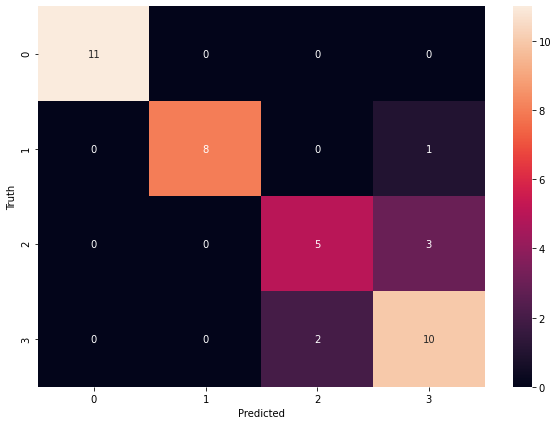

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_classes)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')